# Practical Exercise with MNIST Example

In [1]:
import torch
import torch.nn

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from mnist_classifier.utils import load_mnist
from mnist_classifier.utils import get_model

In [3]:
model_fn = "./model.pth"

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model'], d['config']

In [6]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [7]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

In [8]:
model_dict, train_config = load(model_fn, device)

print(train_config)

Namespace(batch_size=256, dropout_p=0.3, gpu_id=0, model='cnn', model_fn='./model.pth', n_epochs=20, n_layers=5, train_ratio=0.8, use_dropout=False, verbose=1)


In [9]:
# Load MNIST test set.
x, y = load_mnist(is_train=False, flatten=(train_config.model == "fc"))
x, y = x.to(device), y.to(device)

print(x.shape, y.shape)

input_size = int(x.shape[-1])
output_size = int(max(y)) + 1

model = get_model(
    input_size,
    output_size,
    train_config,
    device,
)

model.load_state_dict(model_dict)

test(model, x, y, to_be_shown=False)

torch.Size([10000, 28, 28]) torch.Size([10000])
Accuracy: 0.9916


Accuracy: 1.0000


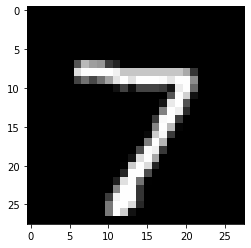

Predict: 7.0


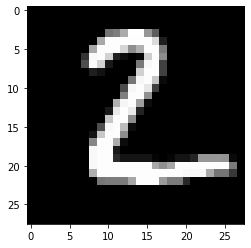

Predict: 2.0


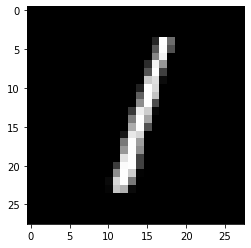

Predict: 1.0


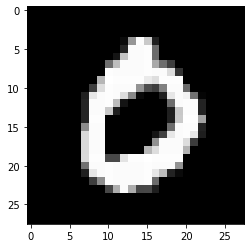

Predict: 0.0


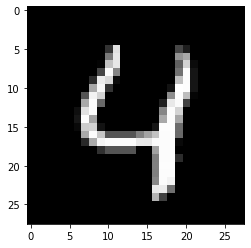

Predict: 4.0


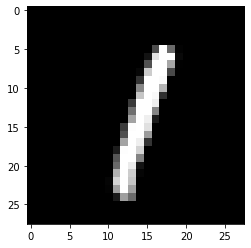

Predict: 1.0


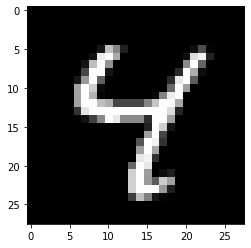

Predict: 4.0


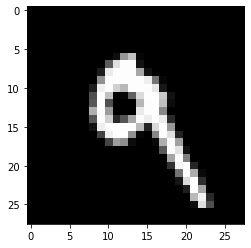

Predict: 9.0


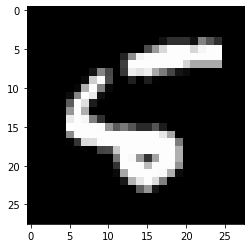

Predict: 5.0


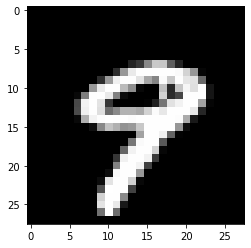

Predict: 9.0


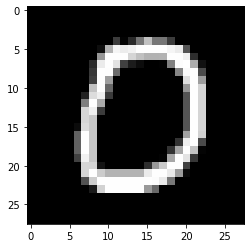

Predict: 0.0


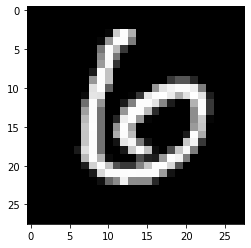

Predict: 6.0


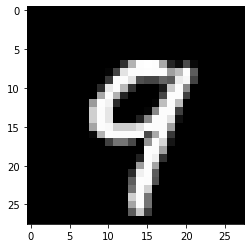

Predict: 9.0


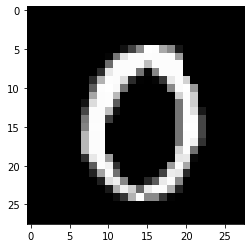

Predict: 0.0


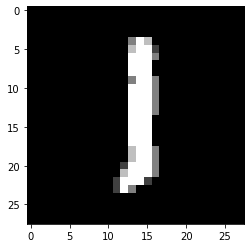

Predict: 1.0


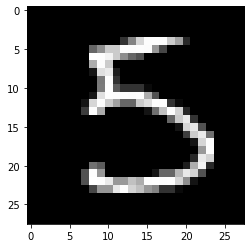

Predict: 5.0


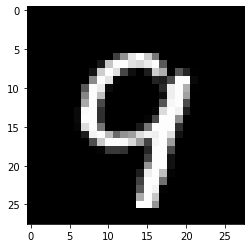

Predict: 9.0


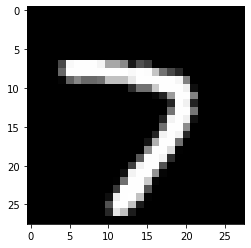

Predict: 7.0


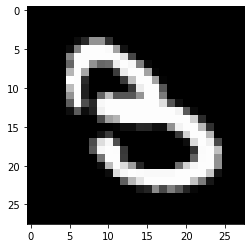

Predict: 3.0


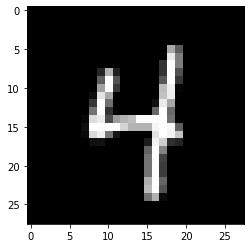

Predict: 4.0


In [10]:
n_test = 20
test(model, x[:n_test], y[:n_test], to_be_shown=True)